In [69]:
from func import *
import numpy as np

In [72]:
#aqui van los paraemtros d ela funcion

asssets = ['AAPL',	'MSFT',	'AMZN',	'TSLA']
n_samples = 500
path = 'dataAdjClose.csv'

<Axes: xlabel='Volatilidad', ylabel='Rendimientos'>

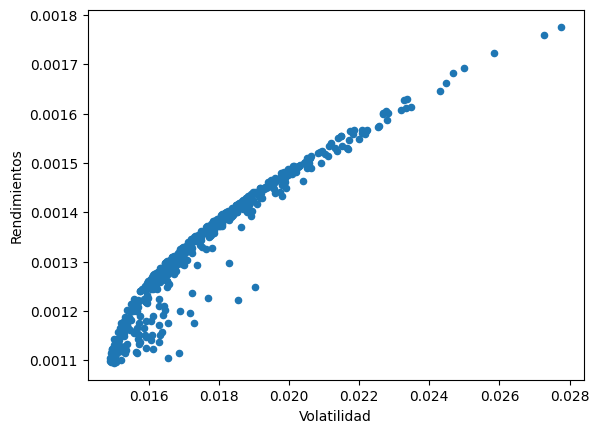

In [73]:
df_complete = load_DB(path=path)  
df_complete['Date'] = pd.to_datetime(df_complete['Date']) #change str to datetime Date column
df_complete= df_complete.set_index('Date') # return the date column as index
filter_df   = df_complete[asssets] # filter about assets list 
filter_df =  filter_df.dropna() #drop NA records
# filder_df.info()
# returns
financial_performance = (filter_df-filter_df.shift(1))/filter_df.shift(1) #   

n_assets = len(filter_df.columns)

#variables 

#redimientos
rportafolio = []
#desviaciones y varianzas/ volatilidad
sdportafolio = []
#pesos
weigths = []

for x in range(n_samples):
    w = np.random.random(n_assets) #random weigths for portfolio composition
    w /=np.sum(w) #normalization 
    weigths.append(w)
    r = np.dot(financial_performance.mean(), w)  #financial_performance.mean() = rendimiento esperado de las diferentes empresas *w da el rendimiento si se invierte en dicho %
    rportafolio.append(r)
    sd = np.sqrt(np.dot(w.T, np.dot(financial_performance.cov(), w))) #volatilidad del portafolio
    sdportafolio.append(sd)

#diccionary 
dicc = {'Rendimientos': rportafolio, 'Volatilidad': sdportafolio}
for c, ticker in enumerate(financial_performance.columns.tolist()):
    dicc[ticker] = [w[c] for w  in weigths]  #tal vez cambiar

#from dicc to df
matrix_portfolios = pd.DataFrame(dicc)

matrix_portfolios.plot(x='Volatilidad', y='Rendimientos', kind ='scatter')

In [67]:
sharpe = matrix_portfolios['Rendimientos']/matrix_portfolios['Volatilidad'] 
sharpe.max()

0.07321213771471881

<Axes: xlabel='Volatilidad', ylabel='Rendimientos'>

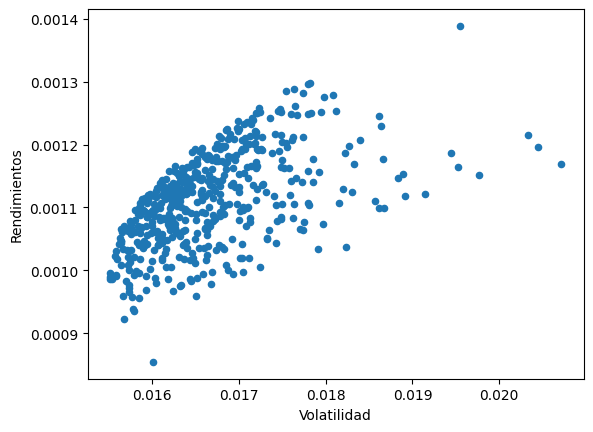

In [52]:
financial_performance.cov()
financial_performance.mean()

AAPL     0.001427
MSFT     0.000794
AMZN     0.001204
GOOGL    0.000999
dtype: float64